<a href="https://colab.research.google.com/github/akparthiban03/samplerepo/blob/main/credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (286786, 31)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286786 entries, 0 to 286785
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    286786 non-null  float64
 1   V1      286786 non-null  float64
 2   V2      286786 non-null  float64
 3   V3      286786 non-null  float64
 4   V4      286786 non-null  float64
 5   V5      286786 non-null  float64
 6   V6      286786 non-null  float64
 7   V7      286786 non-null  float64
 8   V8      286786 non-null  float64
 9   V9      286786 non-null  float64
 10  V10     286786 non-null  float64
 11  V11     286786 non-null  float64
 12  V12     286786 non-null  float64
 13  V13     286786 non-null  float64
 14  V14     286786 non-null  float64
 15  V15     286786 non-null  float64
 16  V16     286786 non-null  float64
 17  V17     286786 non-null  float64
 18  V18     286786 non-null  float64
 19  V19     286786 non-null  float64
 20  V20  

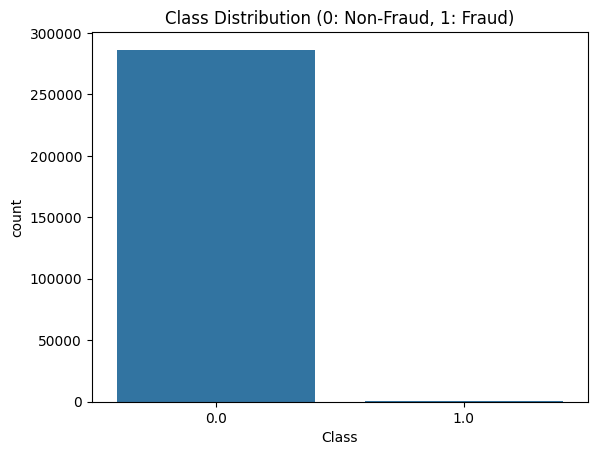

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset
df = pd.read_csv("creditcard.csv")

# Step 3: Basic Info
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

# Step 4: Class Distribution
print("\nClass Distribution:")
print(df['Class'].value_counts())

# Step 5: Plot Class Distribution
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0: Non-Fraud, 1: Fraud)")
plt.show()


Before SMOTE:
0.0    229031
1.0       397
dtype: int64

After SMOTE:
0.0    229031
1.0    229031
dtype: int64


<ipython-input-28-a1f09acc263b>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(before_counts.keys()), y=list(before_counts.values()), ax=axs[0], palette="Set2")
<ipython-input-28-a1f09acc263b>:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(["Non-Fraud (0)", "Fraud (1)"])
<ipython-input-28-a1f09acc263b>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(after_counts.keys()), y=list(after_counts.values()), ax=axs[1], palette="Set1")
<ipython-input-28-a1f09acc263b>:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks(

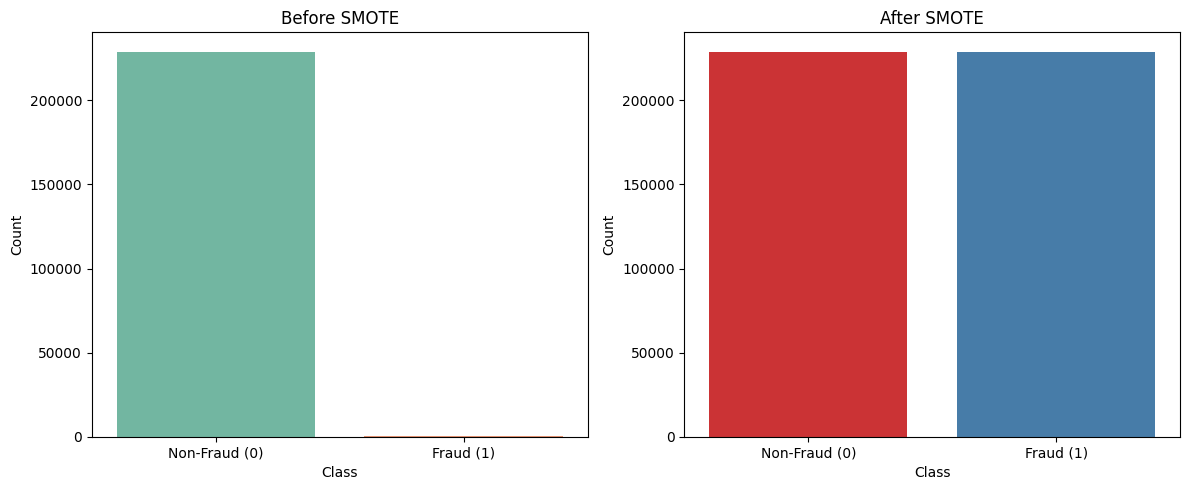

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

# Normalize the 'Amount' column
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

# Drop 'Time' column if it exists
if 'Time' in df.columns:
    df = df.drop(['Time'], axis=1)

# Remove rows with missing 'Class' values
df = df.dropna(subset=['Class'])

# Separate features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Split data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Save original class distribution
before_counts = Counter(y_train)

# Apply SMOTE to balance training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Save balanced class distribution
after_counts = Counter(y_train_res)

# Print class distribution before and after SMOTE
print("Before SMOTE:")
print(pd.Series(before_counts))

print("\nAfter SMOTE:")
print(pd.Series(after_counts))

# 🔽 Add SMOTE visualization
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
sns.barplot(x=list(before_counts.keys()), y=list(before_counts.values()), ax=axs[0], palette="Set2")
axs[0].set_title("Before SMOTE")
axs[0].set_xlabel("Class")
axs[0].set_ylabel("Count")
axs[0].set_xticklabels(["Non-Fraud (0)", "Fraud (1)"])

# After SMOTE
sns.barplot(x=list(after_counts.keys()), y=list(after_counts.values()), ax=axs[1], palette="Set1")
axs[1].set_title("After SMOTE")
axs[1].set_xlabel("Class")
axs[1].set_ylabel("Count")
axs[1].set_xticklabels(["Non-Fraud (0)", "Fraud (1)"])

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Build the model
model = Sequential([
    Dense(32, input_dim=X_train_res.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Train the model
history = model.fit(
    X_train_res, y_train_res,
    epochs=20,
    batch_size=2048,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7760 - loss: 0.4371 - val_accuracy: 0.9060 - val_loss: 0.1780
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9535 - loss: 0.1306 - val_accuracy: 0.9361 - val_loss: 0.1421
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9641 - loss: 0.0988 - val_accuracy: 0.9477 - val_loss: 0.1168
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9705 - loss: 0.0796 - val_accuracy: 0.9622 - val_loss: 0.0881
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9756 - loss: 0.0656 - val_accuracy: 0.9749 - val_loss: 0.0641
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9804 - loss: 0.0539 - val_accuracy: 0.9870 - val_loss: 0.0462
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9847 - loss: 0.0448 - val_accuracy: 0.9912 - val_loss: 0.0384
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9875 - loss: 0.0387 - val_accuracy: 0

1793/1793 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


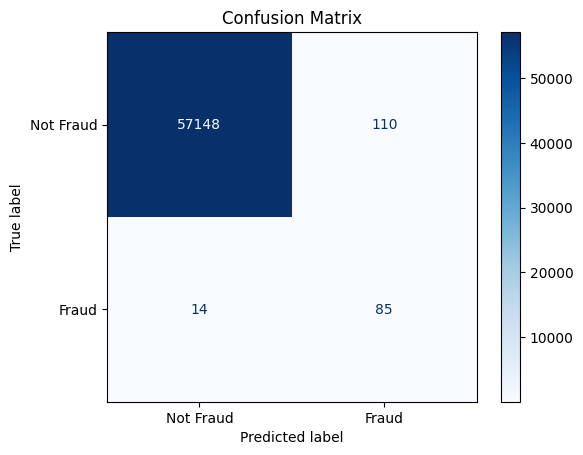

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     57258
         1.0       0.44      0.86      0.58        99

    accuracy                           1.00     57357
   macro avg       0.72      0.93      0.79     57357
weighted avg       1.00      1.00      1.00     57357

ROC-AUC Score: 0.9757


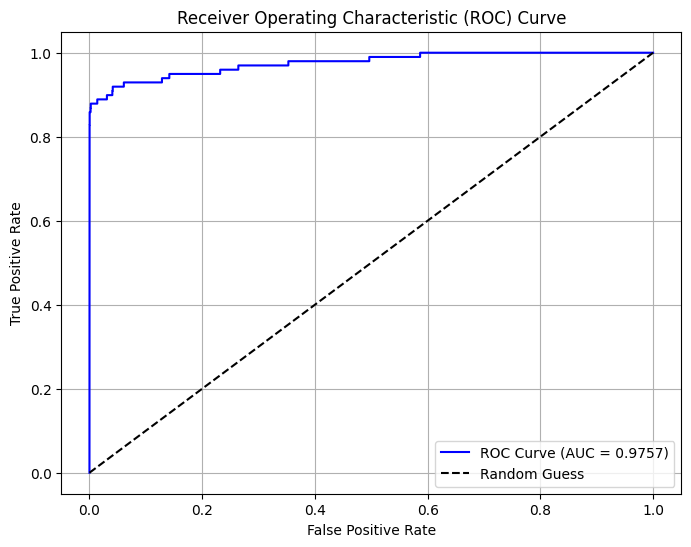

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Predict probabilities
y_pred_prob = model.predict(X_test)

# Step 2: Convert probabilities to binary class (0 or 1)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Step 3: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Step 4: Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 5: ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Step 6: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


💳 Total Transactions: 286785
✅ Actual Non-Fraud Transactions (Class 0): 286289
⚠️ Actual Fraud Transactions (Class 1): 496


<ipython-input-38-d5aa52eff7a6>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Total', 'Non-Fraud', 'Fraud'],


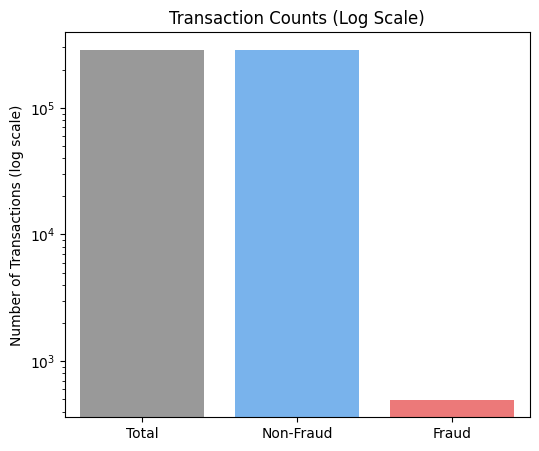

In [ ]:
# Count of each class in the original dataset
fraud_count = df[df['Class'] == 1].shape[0]
non_fraud_count = df[df['Class'] == 0].shape[0]
total_count = df.shape[0]

print(f"💳 Total Transactions: {total_count}")
print(f"✅ Actual Non-Fraud Transactions (Class 0): {non_fraud_count}")
print(f"⚠️ Actual Fraud Transactions (Class 1): {fraud_count}")

# ✅ Visualization
import matplotlib.pyplot as plt
import seaborn as sns


#bar chart

plt.figure(figsize=(6, 5))
sns.barplot(x=['Total', 'Non-Fraud', 'Fraud'],
            y=[total_count, non_fraud_count, fraud_count],
            palette=['#999999', '#66b3ff', '#ff6666'])

plt.yscale('log')  # 👈 log scale to make fraud visible
plt.title('Transaction Counts (Log Scale)')
plt.ylabel('Number of Transactions (log scale)')
plt.show()





In [ ]:
# Filter for fraud transactions (Class == 1)
fraud_transactions = df[df['Class'] == 1]

# Get the indices (which can be treated as transaction IDs)
fraud_transaction_indices = list(fraud_transactions.index)

# Display the first few fraud transaction indices
print(fraud_transaction_indices)  # Show first 10 fraud transaction "IDs"


[541, 623, 4920, 6108, 6329, 6331, 6334, 6336, 6338, 6427, 6446, 6472, 6529, 6609, 6641, 6717, 6719, 6734, 6774, 6820, 6870, 6882, 6899, 6903, 6971, 8296, 8312, 8335, 8615, 8617, 8842, 8845, 8972, 9035, 9179, 9252, 9487, 9509, 10204, 10484, 10497, 10498, 10568, 10630, 10690, 10801, 10891, 10897, 11343, 11710, 11841, 11880, 12070, 12108, 12261, 12369, 14104, 14170, 14197, 14211, 14338, 15166, 15204, 15225, 15451, 15476, 15506, 15539, 15566, 15736, 15751, 15781, 15810, 16415, 16780, 16863, 17317, 17366, 17407, 17453, 17480, 18466, 18472, 18773, 18809, 20198, 23308, 23422, 26802, 27362, 27627, 27738, 27749, 29687, 30100, 30314, 30384, 30398, 30442, 30473, 30496, 31002, 33276, 39183, 40085, 40525, 41395, 41569, 41943, 42007, 42009, 42473, 42528, 42549, 42590, 42609, 42635, 42674, 42696, 42700, 42741, 42756, 42769, 42784, 42856, 42887, 42936, 42945, 42958, 43061, 43160, 43204, 43428, 43624, 43681, 43773, 44001, 44091, 44223, 44270, 44556, 45203, 45732, 46909, 46918, 46998, 47802, 48094, 502

In [ ]:
# Specify the transaction ID you want to check (as an index)
transaction_id = 125
# You can change this to any index ID you want to check

# Check if the transaction is fraud or non-fraud
transaction_class = df.loc[transaction_id, 'Class']

if transaction_class == 1:
    print(f"Transaction ID {transaction_id} is FRAUD.")
else:
    print(f"Transaction ID {transaction_id} is NON-FRAUD.")


Transaction ID 125 is NON-FRAUD.
